<a href="https://colab.research.google.com/github/natthanich/bsc_dpdm22/blob/main/%5Bdataprep3%5DDiscretization_Normalization_One_hot_Encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Normalization
https://scikit-learn.org/stable/modules/preprocessing.html

In [3]:
import pandas as pd

In [1]:
from google.colab import drive # เชื่อมเข้ากับ Drive
drive.mount('/content/drive')  

Mounted at /content/drive


## ใช้ data กรมอุตุ

In [2]:
#เข้าไป path ใน google drive
import os
os.chdir('/content/drive/MyDrive/bsc_DPDM_data/อุตุ')

!pwd #เช็ค paht ที่กำลังทำงานอยู่
!ls 

/content/drive/MyDrive/bsc_DPDM_data/อุตุ
 DataGroup1.csv		 'ความเร็วลม(นอต)'    'อุณหภูมิจุดน้ำค้าง(เซลเซียส)'
'ความกด(เปอร์เซ็นต์)'	 'จำนวนเมฆ(10ส่วน)'   'อุณหภูมิต่ำสุด(เซลเซียส)'
'ความชื้นสัมพัทธ์(เปอร์เซ็นต์)'  'ปริมาณฝน(มิลลิเมตร)'  'อุณหภูมิตุ้มแห้ง(เซลเซียส)'


In [57]:
weather_data = pd.read_csv('DataGroup1.csv')
print(weather_data.shape) # ดูว่ามีข้อมูลทั้งหมดกี่ตัว
weather_data.head(3)

(8169, 20)


,จังหวัด,สถานี_Pressure,สถานี_Humidity,สถานี_Dry_bulb,สถานี_Dew_point,สถานี_Lowest_temp,สถานี_Cloud,สถานี_Rain,สถานี_Wind,วัน,เดือน,ปี,ความกด,ความชื้น,อุณหภูมิตุ้มแห้ง,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,จำนวนเมฆ,ปริมาณฝน,ความเร็วลม
0,ขอนแก่น,352201-หนองคาย จ.หนองคาย,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,353301-เลย สกษ. จ.เลย,381201-ขอนแก่น จ.ขอนแก่น,353301-เลย สกษ. จ.เลย,1,10,2011,1005.47,83,27.6,24.2,24.8,9,1.4,3
1,ขอนแก่น,352201-หนองคาย จ.หนองคาย,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,353301-เลย สกษ. จ.เลย,381201-ขอนแก่น จ.ขอนแก่น,353301-เลย สกษ. จ.เลย,2,10,2011,1006.65,92,25.6,24.0,23.0,10,17.7,2
2,ขอนแก่น,352201-หนองคาย จ.หนองคาย,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,353301-เลย สกษ. จ.เลย,381201-ขอนแก่น จ.ขอนแก่น,353301-เลย สกษ. จ.เลย,3,10,2011,1007.49,86,25.6,22.9,22.1,10,3,3


In [58]:
weather_data.columns

Index(['จังหวัด', 'สถานี_Pressure', 'สถานี_Humidity', 'สถานี_Dry_bulb',
       'สถานี_Dew_point', 'สถานี_Lowest_temp', 'สถานี_Cloud', 'สถานี_Rain',
       'สถานี_Wind', 'วัน', 'เดือน', 'ปี', 'ความกด', 'ความชื้น',
       'อุณหภูมิตุ้มแห้ง', 'อุณหภูมิจุดน้ำค้าง', 'อุณหภูมิต่ำสุด', 'จำนวนเมฆ',
       'ปริมาณฝน', 'ความเร็วลม'],
      dtype='object')

In [59]:
data_features = weather_data.iloc[:,12:]
data_features.head()

,ความกด,ความชื้น,อุณหภูมิตุ้มแห้ง,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,จำนวนเมฆ,ปริมาณฝน,ความเร็วลม
0,1005.47,83,27.6,24.2,24.8,9,1.4,3
1,1006.65,92,25.6,24.0,23.0,10,17.7,2
2,1007.49,86,25.6,22.9,22.1,10,3,3
3,1008.28,80,25.8,21.9,22.8,8,0,2
4,1009.88,86,24.3,21.7,23.1,10,2.2,2


In [23]:
data_features.dtypes

ความกด                float64
ความชื้น                int64
อุณหภูมิตุ้มแห้ง      float64
อุณหภูมิจุดน้ำค้าง    float64
อุณหภูมิต่ำสุด         object
จำนวนเมฆ               object
ปริมาณฝน               object
ความเร็วลม             object
dtype: object

In [60]:
 data_features[data_features.eq('-').any(1)] #หาแถวที่มีค่าที่เราต้องการ  // .any(1) = เอามาทุกอันที่เจอ หาในทุกคอลัมน์

,ความกด,ความชื้น,อุณหภูมิตุ้มแห้ง,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,จำนวนเมฆ,ปริมาณฝน,ความเร็วลม
305,1009.88,78,27.9,23.5,24.3,4,-,4
306,1009.47,73,27.5,21.9,23.7,2,-,2
307,1008.08,69,27.3,20.7,22.5,3,-,3
308,1008.35,72,27.1,21.3,22.8,5,-,5
309,1009.30,72,27.0,21.3,23.5,2,-,2
...,...,...,...,...,...,...,...,...
8086,1016.96,62,21.6,13.4,14.8,-,0,2
8092,1014.85,69,22.3,15.9,16.2,-,0,2
8093,1012.80,66,23.3,15.8,16.5,-,0,1
8117,1014.94,68,24.2,17.4,17.8,-,0,2


### ตัด - และ T ออก
  ``` data_features[data_features.eq('-').any(1) == False]```

In [61]:
data_features[data_features['ความเร็วลม'].eq('-')] #ดูข้อมูลที่ต้องการเฉพาะคอลัมน์    //////  ที่ดํู data_features เพราะว่าเราเอาวันที่ที่ไม่มีจริงออกหมดเเล้ววว 

,ความกด,ความชื้น,อุณหภูมิตุ้มแห้ง,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,จำนวนเมฆ,ปริมาณฝน,ความเร็วลม
1079,1012.65,87,25.8,23.5,24.5,-,53.3,-
1122,1011.47,61,28.5,19.7,22.7,-,-,-
2989,1010.46,64,27.1,18.1,21.9,7,0,-
3044,1010.57,97,22.1,21.1,21.5,10,5.6,-
3133,1011.13,74,21.1,14.1,12.9,1,0,-
3440,1015.90,66,21.9,14.5,15.0,-,0,-
3508,1014.73,72,25.6,19.7,20.5,-,-,-
4724,1011.22,75,27.1,21.9,20.0,1,0,-
4950,1008.50,73,25.6,20.2,20,4,0,-
4953,1009.51,89,24.2,22.0,21.1,7,1.2,-


In [62]:
data_features_d =  data_features[data_features.eq('-').any(1) == False] # == False ไม่เอาาค่านี้ในตาราง

In [63]:
 data_features_d = data_features_d[data_features_d.eq('T').any(1) == False]
 print(data_features_d.shape)
 data_features_d.head(3)

(5061, 8)


,ความกด,ความชื้น,อุณหภูมิตุ้มแห้ง,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,จำนวนเมฆ,ปริมาณฝน,ความเร็วลม
0,1005.47,83,27.6,24.2,24.8,9,1.4,3
1,1006.65,92,25.6,24.0,23.0,10,17.7,2
2,1007.49,86,25.6,22.9,22.1,10,3,3


### เริ่ม Normalization

In [64]:
data_features_d.dtypes

ความกด                float64
ความชื้น                int64
อุณหภูมิตุ้มแห้ง      float64
อุณหภูมิจุดน้ำค้าง    float64
อุณหภูมิต่ำสุด         object
จำนวนเมฆ               object
ปริมาณฝน               object
ความเร็วลม             object
dtype: object

In [65]:
data_features_d['ความเร็วลม'] = data_features_d['ความเร็วลม'].astype(float)
data_features_d['อุณหภูมิต่ำสุด'] = data_features_d['อุณหภูมิต่ำสุด'].astype(float)
data_features_d['จำนวนเมฆ'] = data_features_d['จำนวนเมฆ'].astype(float)
data_features_d['ปริมาณฝน'] = data_features_d['ปริมาณฝน'].astype(float)

In [66]:
data_features_d.describe()

,ความกด,ความชื้น,อุณหภูมิตุ้มแห้ง,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,จำนวนเมฆ,ปริมาณฝน,ความเร็วลม
count,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000
mean,1012.731324,70.438253,25.002667,18.420944,19.933570,3.308832,1.556194,2.284726
std,3.158633,9.433792,2.720534,3.630472,3.295887,2.494353,6.816712,1.209540
min,1002.040000,38.000000,11.800000,1.500000,6.800000,0.000000,0.000000,0.000000
25%,1010.760000,64.000000,23.500000,16.100000,17.900000,1.000000,0.000000,1.000000
50%,1012.610000,69.000000,25.400000,18.500000,20.300000,3.000000,0.000000,2.000000
75%,1014.710000,77.000000,26.900000,21.200000,22.500000,5.000000,0.000000,3.000000
max,1026.100000,99.000000,31.000000,28.400000,26.700000,10.000000,112.400000,10.000000


In [ ]:
data_features_d

In [67]:
import matplotlib as mpl
mpl.rcParams['figure.figsize']=[20,15]


In [68]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

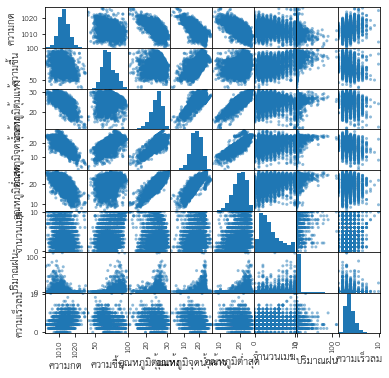

In [69]:
mpl.rcParams['figure.figsize']=[6,6]
pd.plotting.scatter_matrix(data_features_d);

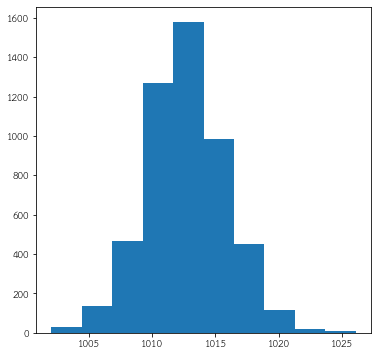

In [70]:
from matplotlib import pyplot as plt
mpl.rcParams['figure.figsize']=[6,6]
plt.hist(data_features_d['ความกด']);

In [72]:
from sklearn import preprocessing

In [79]:
# define  บอกว่าวิธีการที่เราจะทำคือออะไร
scaler = preprocessing.StandardScaler()   #  () เอาไว้ใส่ค่ามาตรฐานที่ต้องการ ตั้งต้น 0 ,1
# train
scaler.fit(data_features_d)   # เอามาสร้างโมเดลจากข้อมูลที่เราต้องการ
#predict - transform(แค่เปลี่ยนรูป)
data_features_d_s = scaler.fit_transform(data_features_d) # เอามาทำนาย ข้อมูลใหม่เรียก predict

In [ ]:
#scaler = preprocessing.StandardScaler()  #จะทำ  pre pocessing ด้วยยparameter
#data_features_d_s = scaler.fit_transform(data_features_d)  ##  รวบ 2 -3 ได้

In [74]:
data_features_d_s # data เกาะะกันอยู่   // พอมาใช้   sklearn ข้อมูลจะเป็น numpy  // data ส่วนมาก จะมีค่าอยู่ระหว่าง -1   --> 1

array([[-2.29910857,  1.33170074,  0.95480871, ...,  2.28184617,
        -0.02291572,  0.5914187 ],
       [-1.92549238,  2.28581221,  0.21958617, ...,  2.68279133,
         2.36850273, -0.23542385],
       [-1.65952832,  1.64973789,  0.21958617, ...,  2.68279133,
         0.21182474,  0.5914187 ],
       ...,
       [ 1.25024518, -0.57652221, -0.8464865 , ..., -1.32666027,
        -0.22831362, -1.06226641],
       [ 0.81647046, -0.89455937, -0.44211411, ..., -0.12382479,
        -0.22831362, -0.23542385],
       [ 0.10406672, -0.57652221,  0.14606392, ..., -0.52476995,
        -0.22831362, -0.23542385]])

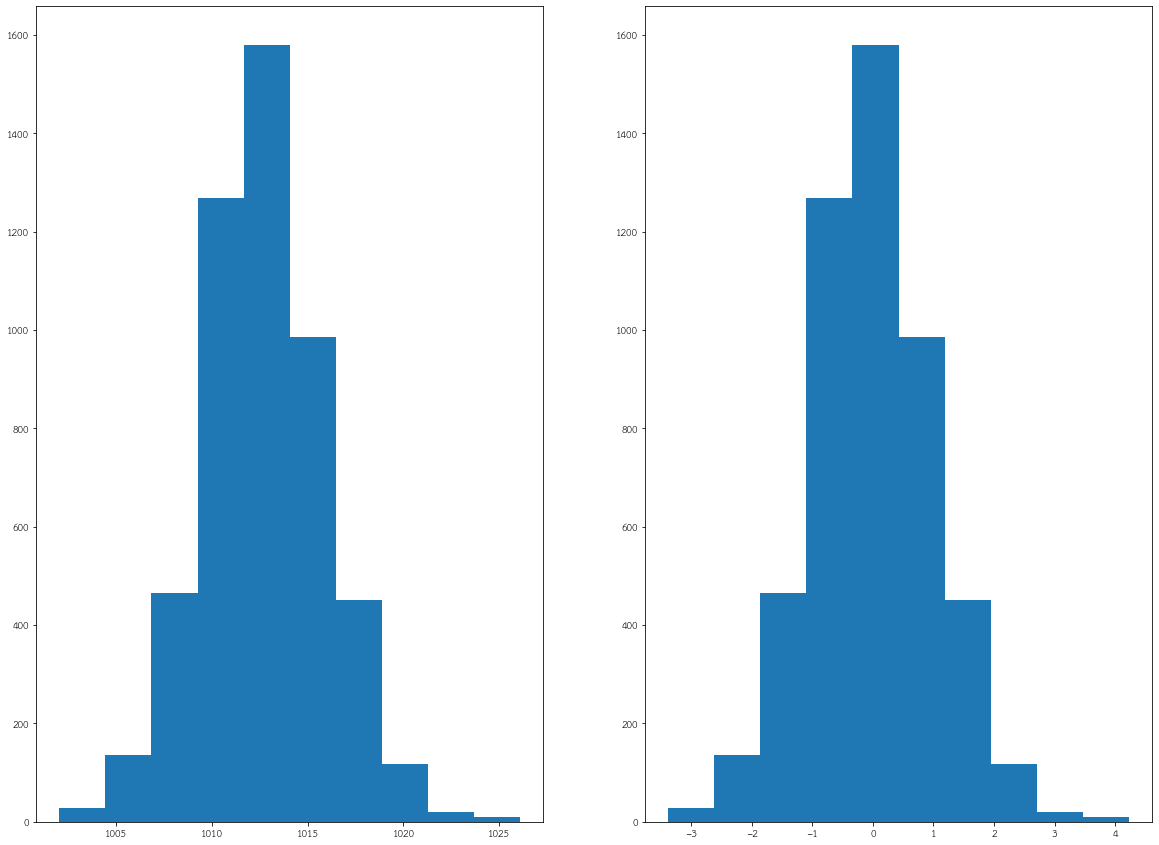

In [77]:
mpl.rcParams['figure.figsize']=[20,15]

plt. subplot(1,2,1)
plt.hist(data_features_d['ความกด'])

plt. subplot(1,2,2)
plt.hist(data_features_d_s[:,0]);

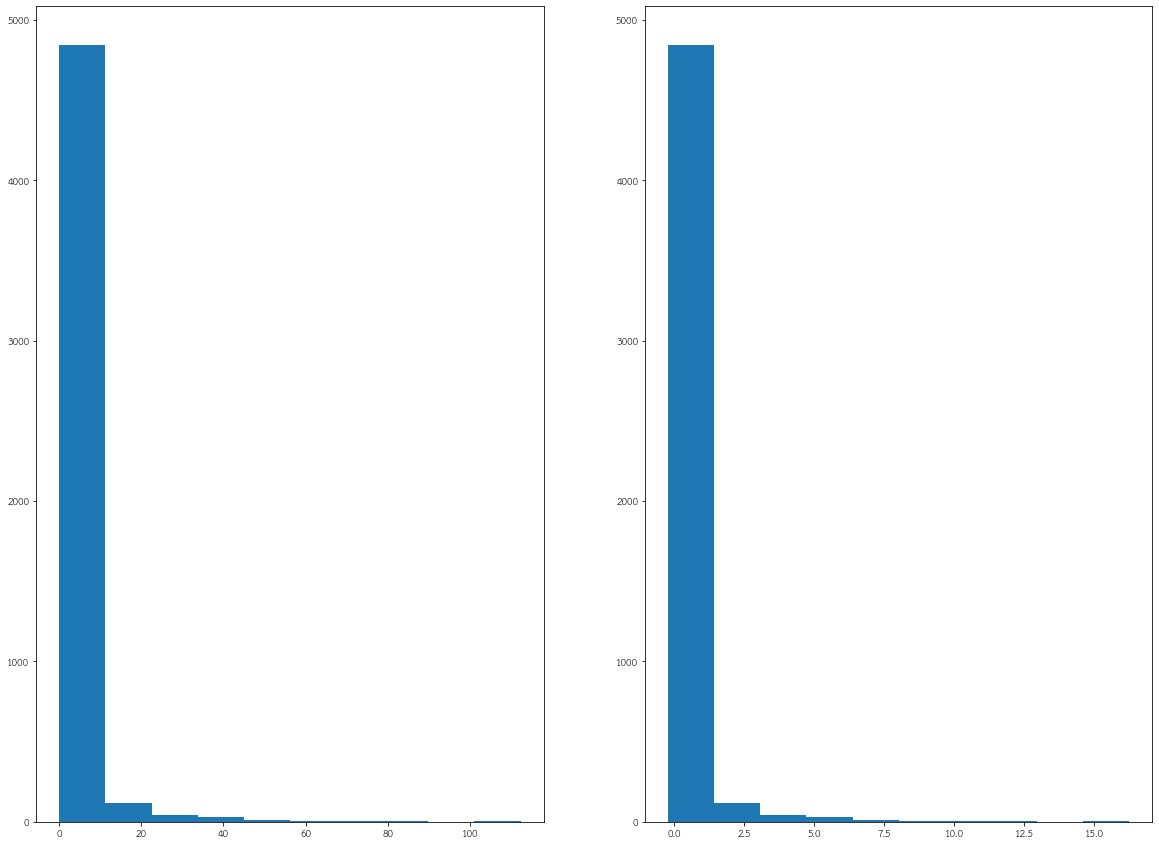

In [78]:
mpl.rcParams['figure.figsize']=[20,15]

plt. subplot(1,2,1)
plt.hist(data_features_d['ปริมาณฝน'])

plt. subplot(1,2,2)
plt.hist(data_features_d_s[:,6]);

### Min-Max Normalization  
เปลี่ยนค่า  min =0 max = 1

### Scaler == ปรับค่าให้อยู่ในมาตรฐานเดียวกัน

In [81]:
# define  บอกว่าวิธีการที่เราจะทำคือออะไร
scaler = preprocessing.MinMaxScaler()   #  () เอาไว้ใส่ค่ามาตรฐานที่ต้องการ ตั้งต้น 0 ,1
# train
scaler.fit(data_features_d)   # เอามาสร้างโมเดลจากข้อมูลที่เราต้องการ
#predict - transform(แค่เปลี่ยนรูป)
data_features_d_norm = scaler.fit_transform(data_features_d) # เอามาทำนาย ข้อมูลใหม่เรียก predict

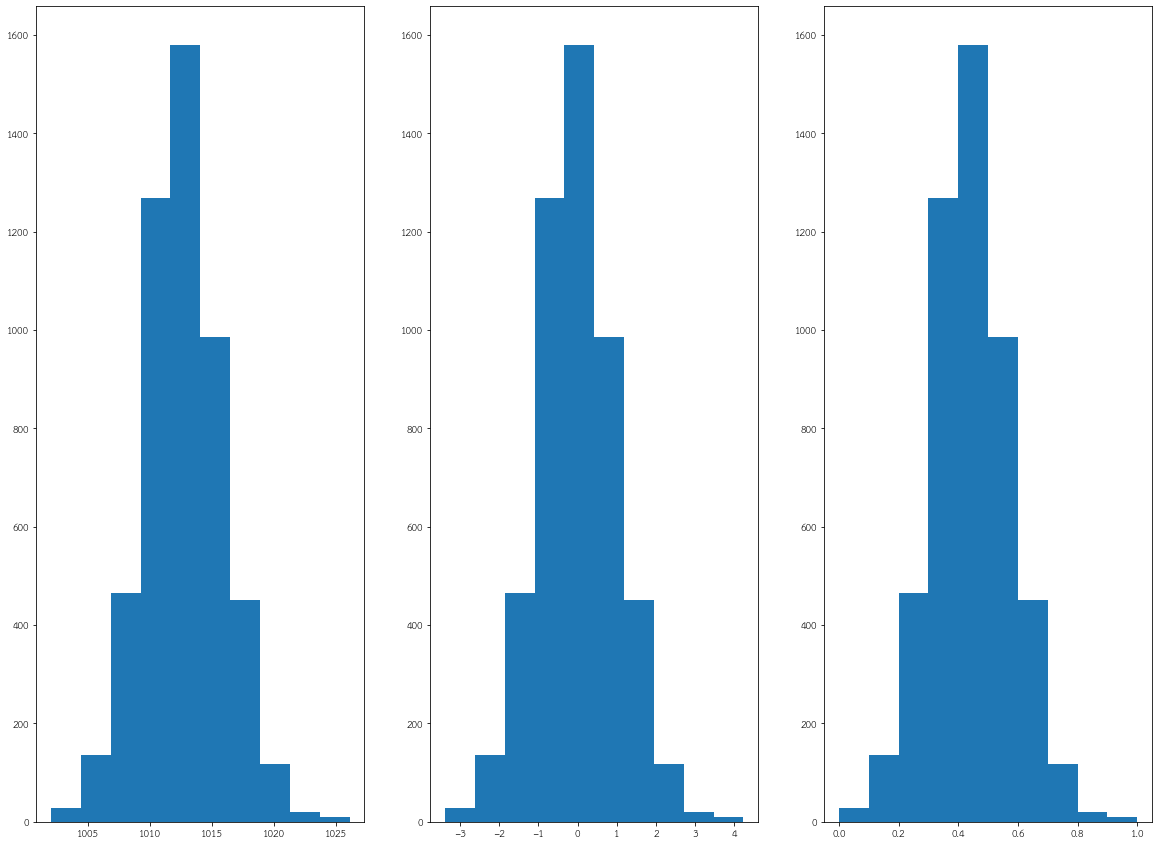

In [85]:
mpl.rcParams['figure.figsize']=[20,15]

plt. subplot(1,3,1)
plt.hist(data_features_d['ความกด'])

plt. subplot(1,3,2)
plt.hist(data_features_d_s[:,0]) # ปรับ Normali   // ดีที่ลู้ max min จริงๆ   // ต้องทำ ดัมมี่ก่อน

plt. subplot(1,3,3)
plt.hist(data_features_d_norm[:,0]); # ปรับ Max-Min ,0-1 // ทำก่อนนดัมมี่

# บ้าน

In [86]:
home_data = pd.read_csv('/content/drive/MyDrive/bsc_DPDM_data/seven11.csv')
print(home_data.shape) # ดูว่ามีข้อมูลทั้งหมดกี่ตัว
home_data.head(3)  #  อยากทำนายราคาบ้าน  // โดยอยากจัดกลุ่มราคาบ้านน  -- ห้ามมี missing  และ ห้ามเเทนค่ามั่ว

(100, 22)


,post_id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,...,district,zone,street,sell_price,d250-7/11,d500-7/11,d750-7/11,d1000-7/11,d1250-7/11,d1500-7/11
0,25.0,0.0,0.0,63.8,1.0,3.0,2.0,0.0,0.0,135.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,NaN,2700000.0,0,1,1,1,1,2
1,33.0,0.0,0.0,61.1,1.0,2.0,2.0,0.0,0.0,112.0,...,เมืองขอนแก่น,กลางเมือง-เมืองเก่า-กุดกว้าง,NaN,2600000.0,0,1,2,3,5,5
2,495.0,NaN,3.0,12.8,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,โพธิสาร,5900000.0,0,0,0,2,2,3


### ลบ record ที่ sell price เป็นค่าว่าง

In [90]:
home_data.isnull().any()

post_id               False
number_of_rai          True
number_of_ngan         True
number_of_va           True
number_of_story        True
number_of_bedroom     False
number_of_bathroom     True
direction             False
furniture             False
usable_area           False
number_of_parking     False
project_name           True
district              False
zone                   True
street                 True
sell_price            False
d250-7/11             False
d500-7/11             False
d750-7/11             False
d1000-7/11            False
d1250-7/11            False
d1500-7/11            False
dtype: bool

In [91]:
home_data = home_data.dropna(subset=['sell_price'])
home_data.head(3)

,post_id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,...,district,zone,street,sell_price,d250-7/11,d500-7/11,d750-7/11,d1000-7/11,d1250-7/11,d1500-7/11
0,25.0,0.0,0.0,63.8,1.0,3.0,2.0,0.0,0.0,135.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,NaN,2700000.0,0,1,1,1,1,2
1,33.0,0.0,0.0,61.1,1.0,2.0,2.0,0.0,0.0,112.0,...,เมืองขอนแก่น,กลางเมือง-เมืองเก่า-กุดกว้าง,NaN,2600000.0,0,1,2,3,5,5
2,495.0,NaN,3.0,12.8,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,โพธิสาร,5900000.0,0,0,0,2,2,3


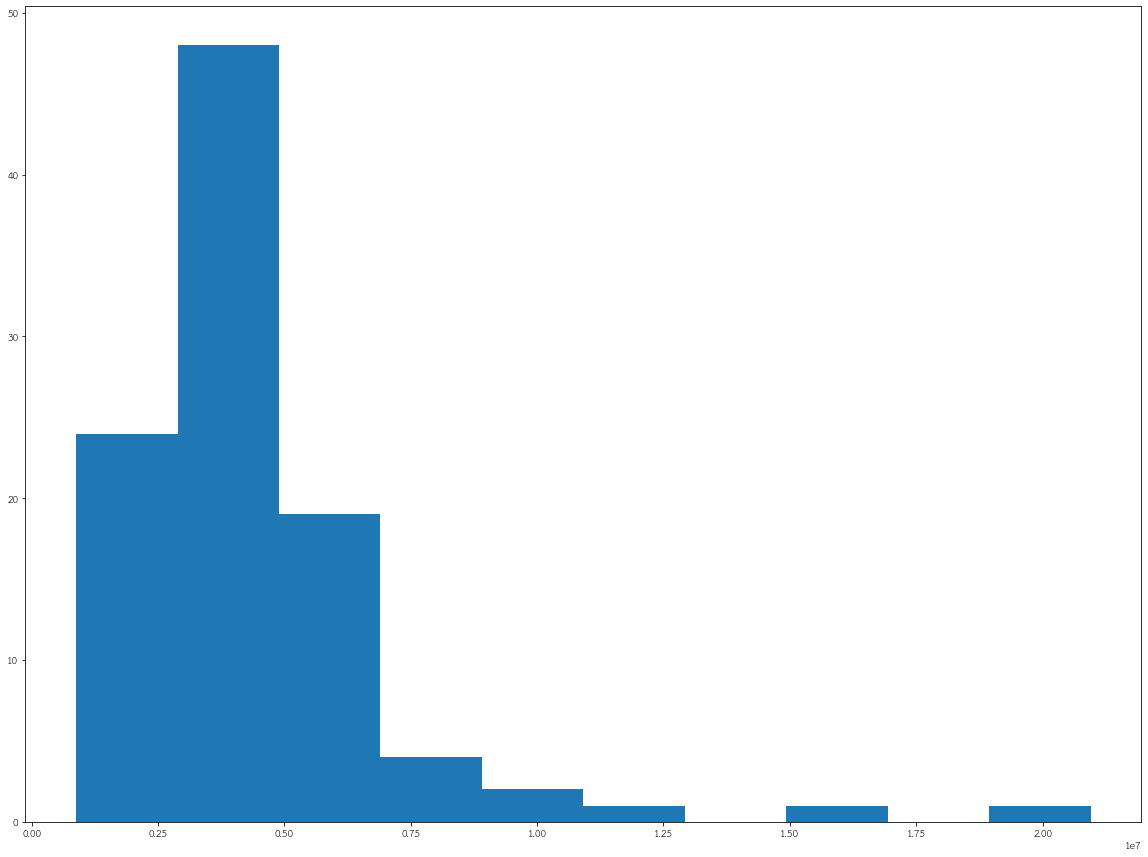

In [93]:
plt.hist(home_data['sell_price']); #ดูการกระจายของข้อมูล

### แปลงค่า sell_price 
- ที่ต่ำกว่า 5mให้เป็น 1 
- ราคาระหว่าง 5m-10m ให้เป็น 2
- ราคา 10m ขึ้นไป ให้เป็น 3

In [96]:
home_data.dtypes

post_id               float64
number_of_rai         float64
number_of_ngan        float64
number_of_va          float64
number_of_story       float64
number_of_bedroom     float64
number_of_bathroom    float64
direction             float64
furniture             float64
usable_area           float64
number_of_parking     float64
project_name           object
district               object
zone                   object
street                 object
sell_price            float64
d250-7/11               int64
d500-7/11               int64
d750-7/11               int64
d1000-7/11              int64
d1250-7/11              int64
d1500-7/11              int64
dtype: object

In [114]:
price_under = home_data[home_data['sell_price'] < 5000000.0]
price_under.insert(22,"price_class","1")
price_under.head()

,post_id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,...,zone,street,sell_price,d250-7/11,d500-7/11,d750-7/11,d1000-7/11,d1250-7/11,d1500-7/11,price_class
0,25.0,0.0,0.0,63.8,1.0,3.0,2.0,0.0,0.0,135.0,...,โนนทัน-บึงแก่นนคร,NaN,2700000.0,0,1,1,1,1,2,1
1,33.0,0.0,0.0,61.1,1.0,2.0,2.0,0.0,0.0,112.0,...,กลางเมือง-เมืองเก่า-กุดกว้าง,NaN,2600000.0,0,1,2,3,5,5,1
3,564.0,NaN,NaN,85.0,NaN,0.0,NaN,0.0,0.0,0.0,...,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,NaN,4400000.0,0,0,2,4,8,12,1
4,566.0,NaN,NaN,65.0,NaN,0.0,NaN,0.0,0.0,0.0,...,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,ศรีจันทร์,2750000.0,0,1,2,3,4,4,1
9,656.0,NaN,NaN,60.0,NaN,0.0,NaN,0.0,0.0,0.0,...,ในเมือง-รื่นรมย์-เทพารักษ์,NaN,4070000.0,0,0,1,2,4,8,1


In [115]:
price_between = home_data[(home_data['sell_price'] >= 5000000.0)& (home_data['sell_price'] <= 10000000.0)]
price_between.insert(22,"price_class","2")
price_between.head()

,post_id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,...,zone,street,sell_price,d250-7/11,d500-7/11,d750-7/11,d1000-7/11,d1250-7/11,d1500-7/11,price_class
2,495.0,NaN,3.0,12.8,NaN,0.0,NaN,0.0,0.0,0.0,...,โนนทัน-บึงแก่นนคร,โพธิสาร,5900000.0,0,0,0,2,2,3,2
5,568.0,NaN,1.0,25.7,NaN,0.0,NaN,0.0,0.0,0.0,...,โนนทัน-บึงแก่นนคร,NaN,5720000.0,0,0,0,0,2,3,2
6,597.0,NaN,2.0,88.4,NaN,0.0,NaN,0.0,0.0,0.0,...,NaN,เหล่านาดี,5712000.0,0,1,1,1,1,1,2
7,624.0,NaN,NaN,98.9,NaN,0.0,NaN,0.0,0.0,0.0,...,โนนทัน-บึงแก่นนคร,รอบบึง,5280000.0,0,0,0,0,2,4,2
32,2143.0,0.0,0.0,65.0,2.0,4.0,3.0,1.0,2.0,0.0,...,โนนทัน-บึงแก่นนคร,ถนนรอบบึง,5200000.0,0,1,1,1,4,6,2


In [116]:
price_upper = home_data[home_data['sell_price'] > 10000000.0]
price_upper.insert(22,"price_class","3")
price_upper.head()

,post_id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,...,zone,street,sell_price,d250-7/11,d500-7/11,d750-7/11,d1000-7/11,d1250-7/11,d1500-7/11,price_class
8,634.0,1.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,...,เหล่านาดี-บ้านสะอาด-บ้านโจด,เหล่านาดี,10263000.0,0,0,1,5,7,11,3
40,3622.0,0.0,1.0,69.0,2.0,4.0,4.0,0.0,3.0,900.0,...,โนนทัน-บึงแก่นนคร,NaN,12500000.0,0,1,1,1,4,6,3
45,5978.0,0.0,1.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,...,กลางเมือง-เมืองเก่า-กุดกว้าง,ถนนกลางเมือง,20949000.0,0,1,2,5,5,7,3
73,12759.0,0.0,1.0,58.0,2.0,5.0,3.0,1.0,3.0,300.0,...,โนนทัน-บึงแก่นนคร,NaN,16500000.0,0,0,1,3,6,8,3


In [117]:
price_class = pd.concat([price_under,price_between,price_upper])
price_class

,post_id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,...,zone,street,sell_price,d250-7/11,d500-7/11,d750-7/11,d1000-7/11,d1250-7/11,d1500-7/11,price_class
0,25.0,0.0,0.0,63.8,1.0,3.0,2.0,0.0,0.0,135.0,...,โนนทัน-บึงแก่นนคร,NaN,2700000.0,0,1,1,1,1,2,1
1,33.0,0.0,0.0,61.1,1.0,2.0,2.0,0.0,0.0,112.0,...,กลางเมือง-เมืองเก่า-กุดกว้าง,NaN,2600000.0,0,1,2,3,5,5,1
3,564.0,NaN,NaN,85.0,NaN,0.0,NaN,0.0,0.0,0.0,...,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,NaN,4400000.0,0,0,2,4,8,12,1
4,566.0,NaN,NaN,65.0,NaN,0.0,NaN,0.0,0.0,0.0,...,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,ศรีจันทร์,2750000.0,0,1,2,3,4,4,1
9,656.0,NaN,NaN,60.0,NaN,0.0,NaN,0.0,0.0,0.0,...,ในเมือง-รื่นรมย์-เทพารักษ์,NaN,4070000.0,0,0,1,2,4,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,19496.0,0.0,2.0,56.8,1.0,0.0,0.0,0.0,0.0,0.0,...,โนนทัน-บึงแก่นนคร,NaN,7911000.0,0,0,0,1,4,9,2
8,634.0,1.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,...,เหล่านาดี-บ้านสะอาด-บ้านโจด,เหล่านาดี,10263000.0,0,0,1,5,7,11,3
40,3622.0,0.0,1.0,69.0,2.0,4.0,4.0,0.0,3.0,900.0,...,โนนทัน-บึงแก่นนคร,NaN,12500000.0,0,1,1,1,4,6,3
45,5978.0,0.0,1.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,...,กลางเมือง-เมืองเก่า-กุดกว้าง,ถนนกลางเมือง,20949000.0,0,1,2,5,5,7,3


In [ ]:
#home_data.loc[home_data['sell_price'] <5000000, 'sell_price_class'] = '1'
#home_data.loc[(home_data['sell_price']>=5000000) & (estate_data['sell_price']<=10000000), 'sell_price_class'] = '2'
#home_data.loc[home_data['sell_price'] >10000000, 'sell_price_class'] = '3'
#home_data

In [ ]:
# ของเพื่อน
def filter(x):
    if x < 5000000:
       return "1"
    if x >= 5000000 &:
       return "3"
    if x > 10000000:
       return "3"



In [ ]:
import numpy as np

In [ ]:
np.where(home_data['sell_price']<50000000,1,home_data['sell_price'])1

# One-hoe-encoder

In [119]:
home_data_dummies = pd.get_dummies(price_class,columns=['zone'])  # price_class,columns=['zone'] ตารางที่จะสร้างdummie,คอลัมน์ที่จะทำ dummie

In [120]:
home_data_dummies

,post_id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,...,zone_ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,zone_บ้านเป็ด-โคกฟันโปง,zone_ม.ภาค-บ้านกอก-บึงหนองโคตร,zone_มะลิวัลย์-ร.8-สนามบิน,zone_ศิลา-โกทา-หนองไผ่-บ้านดอน,zone_สามเหลี่ยม-กังสดาล-ม.ขอนแก่น,zone_เหล่านาดี-บ้านสะอาด-บ้านโจด,zone_โนนทัน-บึงแก่นนคร,zone_โนนม่วง-มข.-เลี่ยงเมือง-โนนเรือง,zone_ในเมือง-รื่นรมย์-เทพารักษ์
0,25.0,0.0,0.0,63.8,1.0,3.0,2.0,0.0,0.0,135.0,...,0,0,0,0,0,0,0,1,0,0
1,33.0,0.0,0.0,61.1,1.0,2.0,2.0,0.0,0.0,112.0,...,0,0,0,0,0,0,0,0,0,0
3,564.0,NaN,NaN,85.0,NaN,0.0,NaN,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
4,566.0,NaN,NaN,65.0,NaN,0.0,NaN,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
9,656.0,NaN,NaN,60.0,NaN,0.0,NaN,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,19496.0,0.0,2.0,56.8,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
8,634.0,1.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
40,3622.0,0.0,1.0,69.0,2.0,4.0,4.0,0.0,3.0,900.0,...,0,0,0,0,0,0,0,1,0,0
45,5978.0,0.0,1.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
